### Ujian Modul 3

## Machine Learning Exam (Bank.csv) - Brandon Lotus

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
from sklearn.model_selection import train_test_split, RandomizedSearchCV, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, classification_report, confusion_matrix

In [3]:
import warnings
warnings.filterwarnings('ignore')

### Data Preprocessing

In [4]:
df = pd.read_csv('bank.csv')
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


Rencana untuk beberapa features sebelum masuk ke machine learning:

- RowNumber --> drop (tidak berhubungan dengan tujuan machine learning)

- CustomerId --> drop (tidak berhubungan dengan tujuan machine learning)

- Surname --> drop (tidak berhubungan dengan tujuan machine learning)

- Geography --> One hot encoding (encoding karena ML hanya menerima numerik, one hot karena Geography merupakan kategori data yg bersifat Nominal atau tidak memiliki tingkatan/urutan)

- Gender --> Label encoding (encoding karena ML hanya menerima numerik, label karena Gender merupakan data binary

Data target Exited tidak balance 20:80
- Model akan kesulitan menebak data kelas minority (Exited 1), akan ada banyak salah prediksi di kelas minority
- Padahal prediksi di kelas minority adalah Goals ML ini
- Melakukan imbalance handling dengan SMOTE

Scaling
- Untuk menyamakan skala antar features
- Digunakan pada algoritma berbasis distance, tidak berpengaruh pada algoritma tree based
- Melakukan scaling dengan robust scaler (karena ada outliers)

### Feature Selection & Feature Engineering

In [5]:
# Drop kolom RowNumber, CustomerId dan Surname karena tidak berhubungan dengan tujuan machine learning
df = df.drop(['RowNumber','CustomerId','Surname'], axis=1)
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [6]:
# Melihat variasi data Geography
df['Geography'].unique()

array(['France', 'Spain', 'Germany'], dtype=object)

In [7]:
# Mengubah Geography menjadi numerik dengan get dummies (one hot encoding)
df = pd.get_dummies(data=df, columns=['Geography'])
df.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain
0,619,Female,42,2,0.00,1,1,1,101348.88,1,1,0,0
1,608,Female,41,1,83807.86,1,0,1,112542.58,0,0,0,1
2,502,Female,42,8,159660.80,3,1,0,113931.57,1,1,0,0
3,699,Female,39,1,0.00,2,0,0,93826.63,0,1,0,0
4,850,Female,43,2,125510.82,1,1,1,79084.10,0,0,0,1


In [8]:
# Mengubah Gender menjadi numerik (label encoding)
df['Gender'] = df['Gender'].map({'Male': 0, 'Female': 1})
df.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain
0,619,1,42,2,0.00,1,1,1,101348.88,1,1,0,0
1,608,1,41,1,83807.86,1,0,1,112542.58,0,0,0,1
2,502,1,42,8,159660.80,3,1,0,113931.57,1,1,0,0
3,699,1,39,1,0.00,2,0,0,93826.63,0,1,0,0
4,850,1,43,2,125510.82,1,1,1,79084.10,0,0,0,1


In [9]:
# Define x (features) dan y (target)
X = df.drop(columns='Exited')
y = df['Exited']

#### Spliting Data

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y, train_size = .8, random_state=42)

#### SMOTE
Membuat data sintetis untuk imbalance handling dari kelas 1 (minority) hingga jumlahnya sama dengan kelas 0 (majority)

In [11]:
import imblearn
from imblearn.over_sampling import SMOTE

In [12]:
sm = SMOTE(random_state=42)

In [13]:
X_train_sm, y_train_sm = sm.fit_sample(X_train, y_train)

In [14]:
df_smote = pd.concat([X_train_sm, y_train_sm], axis = 1)
df_smote['Exited'].value_counts()
# Data pada kolom target sudah seimbang

1    6370
0    6370
Name: Exited, dtype: int64

In [56]:
X_train_sm.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain
0,753,0,57,7,0.00,1,1,0,159475.08,1,0,0
1,739,0,32,3,102128.27,1,1,0,63981.37,0,1,0
2,755,1,37,0,113865.23,2,1,1,117396.25,0,1,0
3,561,0,37,5,0.00,2,1,0,83093.25,1,0,0
4,692,0,49,6,110540.43,2,0,1,107472.99,0,1,0


### Machine Learning Modelling

#### Logistic Regression (Base)

In [59]:
logreg_base =LogisticRegression()
logreg_base.fit(X_train_sm, y_train_sm)
y_pred_logreg_base = logreg_base.predict(X_test)
y_pred_logreg_base_train = logreg_base.predict(X_train_sm)

In [61]:
recall_logreg_base = recall_score(y_test, y_pred_logreg_base)
acc_logreg_base = accuracy_score(y_test, y_pred_logreg_base)
precision_logreg_base = precision_score(y_test, y_pred_logreg_base)
f1_logreg_base = f1_score(y_test, y_pred_logreg_base)
recall_logreg_base_train = recall_score(y_train_sm, y_pred_logreg_base_train)

In [62]:
# Hasil recall untuk train dan test logreg base
print(f"Train recall logreg base: {recall_logreg_base_train}")
print(f"Test recall logreg base: {recall_logreg_base}")

Train recall logreg base: 0.6858712715855573
Test recall logreg base: 0.6805896805896806


In [63]:
print(classification_report(y_test, y_pred_logreg_base))

              precision    recall  f1-score   support

           0       0.89      0.64      0.74      1593
           1       0.32      0.68      0.44       407

    accuracy                           0.65      2000
   macro avg       0.60      0.66      0.59      2000
weighted avg       0.77      0.65      0.68      2000



In [64]:
cm_logreg_base = confusion_matrix(y_test, y_pred_logreg_base, labels = [1,0])
df_logreg_base = pd.DataFrame(data = cm_logreg_base, index = ['aktual 1', 'aktual 0'], columns = ['Prediksi 1', 'Prediksi 0'])
df_logreg_base

,Prediksi 1,Prediksi 0
aktual 1,277,130
aktual 0,580,1013


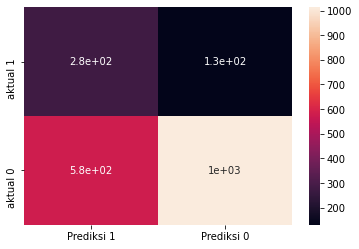

In [65]:
sns.heatmap(df_logreg_base, annot = True)

- Evaluation metrics yang akan difokuskan adalah recall karena yang ingin dihindari adalah nasabah yang pindah namun diprediksi tidak pindah (Prediksi 0 Aktual 1)
- Jumlah untuk (Prediksi 0 Aktual 1) pada model logreg base ini 130
- Nilai recall untuk train (0.685) dan test (0.680) tidak overfit dan cukup baik (masih dapat ditingkatkan)

#### KNN (Base)

In [81]:
KNN_base = KNeighborsClassifier()
KNN_base.fit(X_train_sm, y_train_sm)
y_pred_KNN_base = KNN_base.predict(X_test)
y_pred_KNN_base_train = KNN_base.predict(X_train_sm)

In [82]:
recall_KNN_base = recall_score(y_test, y_pred_KNN_base)
acc_KNN_base = accuracy_score(y_test, y_pred_KNN_base)
precision_KNN_base = precision_score(y_test, y_pred_KNN_base)
f1_KNN_base = f1_score(y_test, y_pred_KNN_base)
recall_KNN_base_train = recall_score(y_train_sm, y_pred_KNN_base_train)

In [83]:
print(f"Train recall KNN base: {recall_KNN_base_train}")
print(f"Test recall KNN base: {recall_KNN_base}")

Train recall KNN base: 0.8671899529042386
Test recall KNN base: 0.4348894348894349


In [84]:
print(classification_report(y_test, y_pred_KNN_base))

              precision    recall  f1-score   support

           0       0.80      0.59      0.68      1593
           1       0.21      0.43      0.28       407

    accuracy                           0.55      2000
   macro avg       0.51      0.51      0.48      2000
weighted avg       0.68      0.55      0.60      2000



In [85]:
cm_KNN_base = confusion_matrix(y_test, y_pred_KNN_base, labels = [1,0])
df_KNN_base = pd.DataFrame(data = cm_KNN_base, index = ['aktual 1', 'aktual 0'], columns = ['Prediksi 1', 'Prediksi 0'])
df_KNN_base

,Prediksi 1,Prediksi 0
aktual 1,177,230
aktual 0,661,932


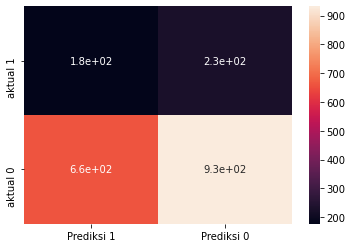

In [86]:
sns.heatmap(df_KNN_base, annot = True)

- Evaluation metrics yang akan difokuskan adalah recall karena yang ingin dihindari adalah nasabah yang pindah namun diprediksi tidak pindah (Prediksi 0 Aktual 1)
- Jumlah untuk (Prediksi 0 Aktual 1) pada model KNN base ini 230 (lebih buruk dari logreg base)
- Nilai recall untuk train (0.867) dan test (0.434) overfit dan kurang baik (dibawah 0.5 / coin toss)

#### Decision Tree (Base)

In [74]:
DT_base =DecisionTreeClassifier()
DT_base.fit(X_train_sm, y_train_sm)
y_pred_DT_base = DT_base.predict(X_test)
y_pred_DT_base_train = DT_base.predict(X_train_sm)

In [75]:
recall_DT_base = recall_score(y_test, y_pred_DT_base)
acc_DT_base = accuracy_score(y_test, y_pred_DT_base)
precision_DT_base = precision_score(y_test, y_pred_DT_base)
f1_DT_base = f1_score(y_test, y_pred_DT_base)
recall_DT_base_train = recall_score(y_train_sm, y_pred_DT_base_train)

In [76]:
print(f"Train recall DT base: {recall_DT_base_train}")
print(f"Test recall DT base: {recall_DT_base}")

Train recall DT base: 1.0
Test recall DT base: 0.5749385749385749


In [77]:
print(classification_report(y_test, y_pred_DT_base))

              precision    recall  f1-score   support

           0       0.88      0.82      0.85      1593
           1       0.45      0.57      0.50       407

    accuracy                           0.77      2000
   macro avg       0.66      0.70      0.68      2000
weighted avg       0.79      0.77      0.78      2000



In [78]:
cm_DT_base = confusion_matrix(y_test, y_pred_DT_base, labels = [1,0])
df_DT_base = pd.DataFrame(data = cm_DT_base, index = ['aktual 1', 'aktual 0'], columns = ['Prediksi 1', 'Prediksi 0'])
df_DT_base

,Prediksi 1,Prediksi 0
aktual 1,234,173
aktual 0,291,1302


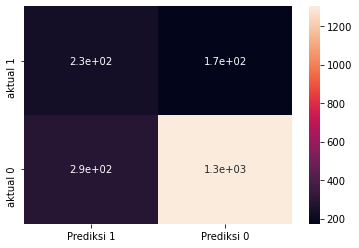

In [79]:
sns.heatmap(df_DT_base, annot =True )

- Evaluation metrics yang akan difokuskan adalah recall karena yang ingin dihindari adalah nasabah yang pindah namun diprediksi tidak pindah (Prediksi 0 Aktual 1)
- Jumlah untuk (Prediksi 0 Aktual 1) pada model decision tree base ini 173 (lebih buruk dari logreg base)
- Nilai recall untuk train (1.00) dan test (0.57) overfit dan masih dapat ditingkatkan

### Scaling (Robust Scaler)

In [15]:
from sklearn.preprocessing import RobustScaler

In [16]:
robust_scaler = RobustScaler()
X_train_scaled = robust_scaler.fit_transform(X_train_sm)
X_test_scaled = robust_scaler.fit_transform(X_test)

#### Logistic Regression (Scaled)

In [94]:
logreg_scaled =LogisticRegression()
logreg_scaled.fit(X_train_scaled, y_train_sm)
y_pred_logreg_scaled = logreg_scaled.predict(X_test_scaled)
y_pred_logreg_scaled_train = logreg_scaled.predict(X_train_scaled)

In [95]:
recall_logreg_scaled = recall_score(y_test, y_pred_logreg_scaled)
acc_logreg_scaled = accuracy_score(y_test, y_pred_logreg_scaled)
precision_logreg_scaled = precision_score(y_test, y_pred_logreg_scaled)
f1_logreg_scaled = f1_score(y_test, y_pred_logreg_scaled)
recall_logreg_scaled_train = recall_score(y_train_sm, y_pred_logreg_scaled_train)

In [96]:
print(f"Train recall logreg scaled: {recall_logreg_scaled_train}")
print(f"Test recall logreg scaled: {recall_logreg_scaled}")

Train recall logreg scaled: 0.7667189952904239
Test recall logreg scaled: 1.0


In [97]:
print(classification_report(y_test, y_pred_logreg_scaled))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00      1593
           1       0.20      1.00      0.34       407

    accuracy                           0.20      2000
   macro avg       0.10      0.50      0.17      2000
weighted avg       0.04      0.20      0.07      2000



In [98]:
cm_logreg_scaled = confusion_matrix(y_test, y_pred_logreg_scaled, labels = [1,0])
df_logreg_scaled = pd.DataFrame(data = cm_logreg_scaled, index = ['aktual 1', 'aktual 0'], columns = ['Prediksi 1', 'Prediksi 0'])
df_logreg_scaled

,Prediksi 1,Prediksi 0
aktual 1,407,0
aktual 0,1593,0


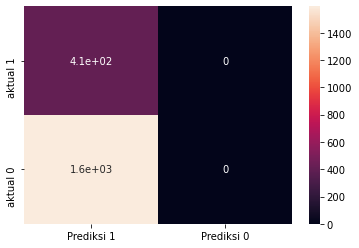

In [99]:
sns.heatmap(df_logreg_scaled, annot = True)

- Evaluation metrics yang akan difokuskan adalah recall karena yang ingin dihindari adalah nasabah yang pindah namun diprediksi tidak pindah (Prediksi 0 Aktual 1)
- Jumlah untuk (Prediksi 0 Aktual 1) pada model logreg scaled ini 0, namun (Prediksi 1 Aktual 0) banyak (1593)
- Nilai recall untuk train (0.76) dan test (1.00)

#### KNN (Scaled)

In [88]:
KNN_scaled = KNeighborsClassifier()
KNN_scaled.fit(X_train_scaled, y_train_sm)
y_pred_KNN_scaled = KNN_scaled.predict(X_test_scaled)
y_pred_KNN_scaled_train = KNN_scaled.predict(X_train_scaled)

In [89]:
recall_KNN_scaled = recall_score(y_test, y_pred_KNN_scaled)
acc_KNN_scaled = accuracy_score(y_test, y_pred_KNN_scaled)
precision_KNN_scaled = precision_score(y_test, y_pred_KNN_scaled)
f1_KNN_scaled = f1_score(y_test, y_pred_KNN_scaled)
recall_KNN_scaled_train = recall_score(y_train_sm, y_pred_KNN_scaled_train)

In [90]:
print(f"Train recall KNN scaled: {recall_KNN_scaled_train}")
print(f"Test recall KNN scaled: {recall_KNN_scaled}")

Train recall KNN scaled: 0.8883830455259026
Test recall KNN scaled: 0.8722358722358723


In [91]:
print(classification_report(y_test, y_pred_KNN_scaled))

              precision    recall  f1-score   support

           0       0.91      0.34      0.50      1593
           1       0.25      0.87      0.39       407

    accuracy                           0.45      2000
   macro avg       0.58      0.61      0.44      2000
weighted avg       0.78      0.45      0.48      2000



In [92]:
cm_KNN_scaled = confusion_matrix(y_test, y_pred_KNN_scaled, labels = [1,0])
df_KNN_scaled = pd.DataFrame(data = cm_KNN_scaled, index = ['aktual 1', 'aktual 0'], columns = ['Prediksi 1', 'Prediksi 0'])
df_KNN_scaled

,Prediksi 1,Prediksi 0
aktual 1,355,52
aktual 0,1050,543


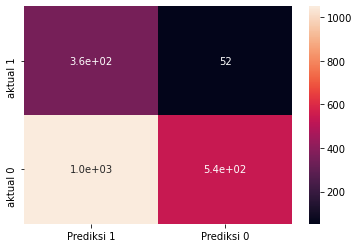

In [93]:
sns.heatmap(df_KNN_scaled, annot = True)

- Evaluation metrics yang akan difokuskan adalah recall karena yang ingin dihindari adalah nasabah yang pindah namun diprediksi tidak pindah (Prediksi 0 Aktual 1)
- Jumlah untuk (Prediksi 0 Aktual 1) pada model KNN scaled ini 52 (lebih baik dari KNN base)
- Nilai recall untuk train (0.888) dan test (0.872) tidak overfit lagi dan sudah cukup baik

#### Model Decision Tree tidak dilakukan scaling karena tidak berlaku pada model tree based

### Hyperparameter Tuning

#### Logistic Regression (Hyperparameter Tuning)

In [101]:
logreg_tuning = LogisticRegression()
param_logreg = {'C': [1, 0.5, 0.1, 5, 9],
               'penalty':['l2','l1', 'elasticnet']}

model_logreg_tuned = GridSearchCV(estimator = logreg_tuning, param_grid = param_logreg, cv = 5, n_jobs = -1 , verbose = 1, scoring = 'recall')
model_logreg_tuned.fit(X_train_sm, y_train_sm)

Fitting 5 folds for each of 15 candidates, totalling 75 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    3.1s
[Parallel(n_jobs=-1)]: Done  60 out of  75 | elapsed:    3.8s remaining:    0.9s
[Parallel(n_jobs=-1)]: Done  75 out of  75 | elapsed:    5.0s finished


GridSearchCV(cv=5, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [1, 0.5, 0.1, 5, 9],
                         'penalty': ['l2', 'l1', 'elasticnet']},
             scoring='recall', verbose=1)

In [102]:
logreg_tuned = model_logreg_tuned.best_estimator_
y_pred_logreg_tuned = logreg_tuned.predict(X_test)
y_pred_logreg_train_tuned = logreg_tuned.predict(X_train_sm)

In [103]:
recall_logreg_tuned = recall_score(y_test, y_pred_logreg_tuned)
acc_logreg_tuned = accuracy_score(y_test, y_pred_logreg_tuned)
precision_logreg_tuned = precision_score(y_test, y_pred_logreg_tuned)
f1_logreg_tuned = f1_score(y_test, y_pred_logreg_tuned)
recall_logreg_train_tuned = recall_score(y_train_sm, y_pred_logreg_train_tuned)

In [104]:
print(f"Train recall logreg tuned: {recall_logreg_train_tuned}")
print(f"Test recall logreg tuned: {recall_logreg_tuned}")

Train recall logreg tuned: 0.6858712715855573
Test recall logreg tuned: 0.6805896805896806


In [105]:
print(classification_report(y_test, y_pred_logreg_tuned))

              precision    recall  f1-score   support

           0       0.89      0.64      0.74      1593
           1       0.32      0.68      0.44       407

    accuracy                           0.65      2000
   macro avg       0.60      0.66      0.59      2000
weighted avg       0.77      0.65      0.68      2000



In [108]:
cm_logreg_tuned = confusion_matrix(y_test, y_pred_logreg_tuned, labels = [1,0])
df_logreg_tuned = pd.DataFrame(data = cm_logreg_tuned, index = ['aktual 1', 'aktual 0'], columns = ['Prediksi 1', 'Prediksi 0'])
df_logreg_tuned

,Prediksi 1,Prediksi 0
aktual 1,277,130
aktual 0,580,1013


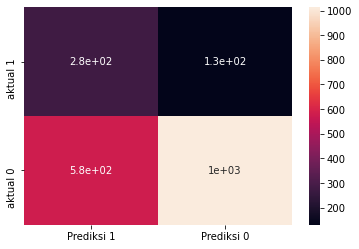

In [109]:
sns.heatmap(df_logreg_tuned, annot =True)

- Evaluation metrics yang akan difokuskan adalah recall karena yang ingin dihindari adalah nasabah yang pindah namun diprediksi tidak pindah (Prediksi 0 Aktual 1)
- Jumlah untuk (Prediksi 0 Aktual 1) pada model logreg tuned ini 130 (tidak ada perubahan dengan model logreg base)
- Nilai recall untuk train (0.685) dan test (0.680) tidak berbeda dengan logreg base

#### KNN (Hyperparameter Tuning)

In [17]:
KNN_tuning = KNeighborsClassifier()
param_KNN = {'n_neighbors':[5,7,9],
               'weights':['uniform','distance'],
               'p':[2, 1]}

In [18]:
model_KNN_tuned = GridSearchCV(estimator = KNN_tuning, param_grid = param_KNN, cv = 3, n_jobs = -1 , verbose = 1, scoring = 'recall')

In [20]:
model_KNN_tuned.fit(X_train_sm, y_train_sm)

Fitting 3 folds for each of 12 candidates, totalling 36 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  36 out of  36 | elapsed:    3.2s finished


GridSearchCV(cv=3, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'n_neighbors': [5, 7, 9], 'p': [2, 1],
                         'weights': ['uniform', 'distance']},
             scoring='recall', verbose=1)

In [21]:
KNN_tuned = model_KNN_tuned.best_estimator_
y_tuned_KNN = KNN_tuned.predict(X_test)
cm_KNN_tuned = confusion_matrix(y_test, y_tuned_KNN, labels = [1,0])
cm_KNN_tuned

array([[171, 236],
       [599, 994]], dtype=int64)

In [22]:
acc_KNN_tuned = accuracy_score(y_test, y_tuned_KNN)
prec_KNN_tuned = precision_score(y_test, y_tuned_KNN)
rec_KNN_tuned = recall_score(y_test, y_tuned_KNN)
f1_KNN_tuned = f1_score(y_test,y_tuned_KNN)

print(classification_report(y_test, y_tuned_KNN))

              precision    recall  f1-score   support

           0       0.81      0.62      0.70      1593
           1       0.22      0.42      0.29       407

    accuracy                           0.58      2000
   macro avg       0.52      0.52      0.50      2000
weighted avg       0.69      0.58      0.62      2000



In [23]:
df_KNN_tuned = pd.DataFrame(data = cm_KNN_tuned , index = ["Aktual 1","Aktual 0"], columns = ["Prediksi 1", "Prediksi 0"])
df_KNN_tuned

,Prediksi 1,Prediksi 0
Aktual 1,171,236
Aktual 0,599,994


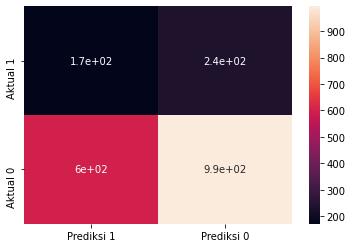

In [24]:
sns.heatmap(df_KNN_tuned, annot = True)

- Evaluation metrics yang akan difokuskan adalah recall karena yang ingin dihindari adalah nasabah yang pindah namun diprediksi tidak pindah (Prediksi 0 Aktual 1)
- Jumlah untuk (Prediksi 0 Aktual 1) pada model logreg tuned ini 236 dan recall test 0.42

#### Decision Tree (Hyperparameter Tuning)

In [30]:
DT_tuning = DecisionTreeClassifier()
param_DT =  {
    "max_depth": [None, 4,9,15,20,50],
    "min_samples_leaf": [ 1,4,0.1,2,10],
    "max_features" : [None, 0.2, 0.8, 2.0],
    "min_samples_split": [2,9,15,25]}

In [31]:
model_DT_tuned = GridSearchCV(estimator = DT_tuning, param_grid = param_DT, cv = 3, n_jobs = -1 , verbose = 1, scoring = 'recall')

In [32]:
model_DT_tuned.fit(X_train_sm,y_train_sm)

Fitting 3 folds for each of 480 candidates, totalling 1440 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 656 tasks      | elapsed:    3.3s
[Parallel(n_jobs=-1)]: Done 1425 out of 1440 | elapsed:    7.4s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done 1440 out of 1440 | elapsed:    7.5s finished


GridSearchCV(cv=3, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'max_depth': [None, 4, 9, 15, 20, 50],
                         'max_features': [None, 0.2, 0.8, 2.0],
                         'min_samples_leaf': [1, 4, 0.1, 2, 10],
                         'min_samples_split': [2, 9, 15, 25]},
             scoring='recall', verbose=1)

In [33]:
DT_tuned = model_DT_tuned.best_estimator_

In [34]:
y_tuned_DT = DT_tuned.predict(X_test)

In [35]:
cm_DT_tuned = confusion_matrix(y_test, y_tuned_DT, labels = [1,0])
cm_DT_tuned

array([[ 220,  187],
       [ 501, 1092]], dtype=int64)

In [36]:
acc_DT_tuned = accuracy_score(y_test, y_tuned_DT)
prec_DT_tuned = precision_score(y_test, y_tuned_DT)
rec_DT_tuned = recall_score(y_test, y_tuned_DT)
f1_DT_tuned = f1_score(y_test,y_tuned_DT)

print(classification_report(y_test, y_tuned_DT))

              precision    recall  f1-score   support

           0       0.85      0.69      0.76      1593
           1       0.31      0.54      0.39       407

    accuracy                           0.66      2000
   macro avg       0.58      0.61      0.58      2000
weighted avg       0.74      0.66      0.69      2000



In [37]:
df_DT_tuned = pd.DataFrame(data = cm_DT_tuned , index = ["Aktual 1","Aktual 0"], columns = ["Prediksi 1", "Prediksi 0"])
df_DT_tuned

,Prediksi 1,Prediksi 0
Aktual 1,220,187
Aktual 0,501,1092


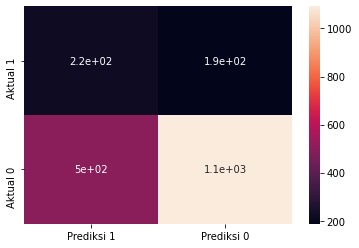

In [38]:
sns.heatmap(df_DT_tuned, annot = True)

- Evaluation metrics yang akan difokuskan adalah recall karena yang ingin dihindari adalah nasabah yang pindah namun diprediksi tidak pindah (Prediksi 0 Aktual 1)
- Jumlah untuk (Prediksi 0 Aktual 1) pada model logreg tuned ini 187 dan recall test 0.54

### Perbandingan Seluruh Model

In [119]:
print(classification_report(y_test, y_pred_logreg_base))
df_logreg_base

              precision    recall  f1-score   support

           0       0.89      0.64      0.74      1593
           1       0.32      0.68      0.44       407

    accuracy                           0.65      2000
   macro avg       0.60      0.66      0.59      2000
weighted avg       0.77      0.65      0.68      2000



,Prediksi 1,Prediksi 0
aktual 1,277,130
aktual 0,580,1013


In [114]:
print(classification_report(y_test, y_pred_KNN_base))
df_KNN_base

              precision    recall  f1-score   support

           0       0.80      0.59      0.68      1593
           1       0.21      0.43      0.28       407

    accuracy                           0.55      2000
   macro avg       0.51      0.51      0.48      2000
weighted avg       0.68      0.55      0.60      2000



,Prediksi 1,Prediksi 0
aktual 1,177,230
aktual 0,661,932


In [115]:
print(classification_report(y_test, y_pred_DT_base))
df_DT_base

              precision    recall  f1-score   support

           0       0.88      0.82      0.85      1593
           1       0.45      0.57      0.50       407

    accuracy                           0.77      2000
   macro avg       0.66      0.70      0.68      2000
weighted avg       0.79      0.77      0.78      2000



,Prediksi 1,Prediksi 0
aktual 1,234,173
aktual 0,291,1302


In [116]:
print(classification_report(y_test, y_pred_logreg_scaled))
df_logreg_scaled

              precision    recall  f1-score   support

           0       0.00      0.00      0.00      1593
           1       0.20      1.00      0.34       407

    accuracy                           0.20      2000
   macro avg       0.10      0.50      0.17      2000
weighted avg       0.04      0.20      0.07      2000



,Prediksi 1,Prediksi 0
aktual 1,407,0
aktual 0,1593,0


In [117]:
print(classification_report(y_test, y_pred_KNN_scaled))
df_KNN_scaled

              precision    recall  f1-score   support

           0       0.91      0.34      0.50      1593
           1       0.25      0.87      0.39       407

    accuracy                           0.45      2000
   macro avg       0.58      0.61      0.44      2000
weighted avg       0.78      0.45      0.48      2000



,Prediksi 1,Prediksi 0
aktual 1,355,52
aktual 0,1050,543


In [118]:
print(classification_report(y_test, y_pred_logreg_tuned))
df_logreg_tuned

              precision    recall  f1-score   support

           0       0.89      0.64      0.74      1593
           1       0.32      0.68      0.44       407

    accuracy                           0.65      2000
   macro avg       0.60      0.66      0.59      2000
weighted avg       0.77      0.65      0.68      2000



,Prediksi 1,Prediksi 0
aktual 1,277,130
aktual 0,580,1013


In [40]:
print(classification_report(y_test, y_tuned_KNN))
df_KNN_tuned

              precision    recall  f1-score   support

           0       0.81      0.62      0.70      1593
           1       0.22      0.42      0.29       407

    accuracy                           0.58      2000
   macro avg       0.52      0.52      0.50      2000
weighted avg       0.69      0.58      0.62      2000



,Prediksi 1,Prediksi 0
Aktual 1,171,236
Aktual 0,599,994


In [39]:
print(classification_report(y_test, y_tuned_DT))
df_DT_tuned

              precision    recall  f1-score   support

           0       0.85      0.69      0.76      1593
           1       0.31      0.54      0.39       407

    accuracy                           0.66      2000
   macro avg       0.58      0.61      0.58      2000
weighted avg       0.74      0.66      0.69      2000



,Prediksi 1,Prediksi 0
Aktual 1,220,187
Aktual 0,501,1092


In [120]:
# Model terbaik adalah KNN Scaled
# Export Model
import joblib
joblib.dump(KNN_scaled, 'ModelBank')

['ModelBank']

### Kesimpulan

- Persentase nasabah yang pindah sebanyak 20.4%, dimana angka tersebut diusahakan untuk dapat diturunkan
- Rentang usia nasabah terbanyak di usia 30-40 tahun
- Kemungkinan nasabah yang pindah berbanding lurus dengan meningkatnya usia nasabah
- Nasabah wanita lebih tinggi kemungkinan untuk pindah bank dibandingkan nasabah laki-laki
- Nasabah di Jerman lebih tinggi kemungkinan untuk pindah bank dibandingkan nasabah di Perancis dan Spanyol
- Nasabah yang aktif sebagai member lebih rendah kemungkinan untuk pindah bank
- Feature dengan korelasi terkuat dengan target adalah Age (0.285)
- Evaluation metrics yang difokuskan adalah recall karena yang ingin dihindari adalah nasabah yang pindah namun diprediksi tidak pindah (Prediksi 0 Aktual 1)
- Dari kedelapan model, model terbaik adalah KNN Scaled dengan jumlah untuk (Prediksi 0 Aktual 1) ini 52 dan nilai recall untuk train (0.888) dan test (0.872)

### Saran

- Bank dapat menawarkan produk-produk baru yang dapat meningkatkan kesetiaan nasabah seperti sistem kredit yang terjangkau dan deposito dengan bunga yang besar
- Bank dapat melakukan strategi marketing untuk menarik nasabah wanita yang lebih cenderung mudah pindah dibanding laki-laki
- Bank dapat lebih gencar melakukan promosi di Perancis karena selain jumlah nasabah lebih banyak juga tingkat kecenderungan untuk pindah lebih rendah dibandingkan negara lain
- Bank dapat mengadakan kegiatan rutin untuk nasabah agar dapat meningkatkan tingkat keaktifan nasabah bank